<a href="https://colab.research.google.com/github/vedanthshenoy/Sales-Analysis-Prediction-and-Recommendation/blob/main/shop_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/shopdata.csv',parse_dates=['InvoiceDate'],encoding= 'unicode_escape',index_col='InvoiceDate')
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [ ]:
data['Day']=data.index.day
data['Month']=data.index.month
data['DayOfWeek']=data.index.day_name()
data.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,DayOfWeek
InvoiceDate,,,,,,,,,,
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,9,12,Friday
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,9,12,Friday
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,9,12,Friday
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,9,12,Friday
2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,9,12,Friday


## Drop NaN values

In [ ]:
nan_data=data[data.isna().any(axis=1)]
nan_data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,DayOfWeek
InvoiceDate,,,,,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,56,0.00,NaN,United Kingdom,1,12,Wednesday
2010-12-01 14:32:00,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,1,12,Wednesday
2010-12-01 14:32:00,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,1,12,Wednesday
2010-12-01 14:32:00,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,1,12,Wednesday
2010-12-01 14:32:00,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,1,12,Wednesday


In [ ]:
data=data.dropna(how='any')
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,DayOfWeek
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,Wednesday
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,Wednesday
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,Wednesday
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,Wednesday
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,Wednesday


In [ ]:
data['Sales']=data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,DayOfWeek,Sales
InvoiceDate,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,Wednesday,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,Wednesday,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,Wednesday,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,Wednesday,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,Wednesday,20.34


## Which country made most sales

In [ ]:
sale_by_country=pd.DataFrame(data.groupby('Country').sum()[['Sales']])
sale_by_country

,Sales
Country,
Australia,1.370773e+05
Austria,1.015432e+04
Bahrain,5.484000e+02
Belgium,4.091096e+04
Brazil,1.143600e+03
Canada,3.666380e+03
Channel Islands,2.008629e+04
Cyprus,1.294629e+04
Czech Republic,7.077200e+02


Country with most sale

In [ ]:
sale_by_country.idxmax()

Sales    United Kingdom
dtype: object

Country with least sale

In [ ]:
sale_by_country.idxmin()

Sales    Saudi Arabia
dtype: object

We only consider UK because it has most sales

In [ ]:
data=data.loc[data['Country'] == 'United Kingdom']
data.Country.unique()

array(['United Kingdom'], dtype=object)

Which Month had most sales

In [ ]:
sale_by_month=pd.DataFrame(data.groupby('Month').sum()[['Sales']])
sale_by_month

,Sales
Month,
1,351981.280
2,348853.630
3,456917.870
4,376744.411
5,525573.350
6,472509.250
7,461147.601
8,477008.410
9,776529.842


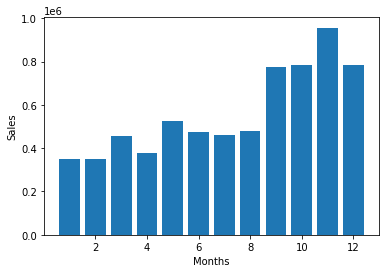

In [ ]:
import matplotlib.pyplot as plt

plt.bar(sale_by_month.index,sale_by_month.Sales)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [ ]:
sale_by_month.idxmax()

Sales    11
dtype: int64

In [ ]:
sale_by_DayOfWeek=pd.DataFrame(data.groupby('DayOfWeek').sum()[['Sales']])
sale_by_DayOfWeek

,Sales
DayOfWeek,
Friday,982767.831
Monday,1056865.331
Sunday,687310.931
Thursday,1517410.700
Tuesday,1287595.811
Wednesday,1235922.790


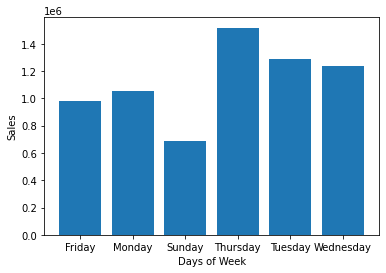

In [ ]:
plt.bar(sale_by_DayOfWeek.index,sale_by_DayOfWeek.Sales)
plt.xlabel('Days of Week')
plt.ylabel('Sales')
plt.show()

In [ ]:
sale_by_DayOfWeek.idxmax()

Sales    Thursday
dtype: object

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'Day', 'Month', 'DayOfWeek', 'Sales'],
      dtype='object')

In [ ]:
print(len(data['CustomerID'].unique()))
print(len(data['Description'].unique()))

3950
3860


In [ ]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     1980
REGENCY CAKESTAND 3 TIER               1574
JUMBO BAG RED RETROSPOT                1505
ASSORTED COLOUR BIRD ORNAMENT          1343
PARTY BUNTING                          1327
                                       ... 
BIRD ON BRANCH CANVAS SCREEN              1
GLASS AND PAINTED BEADS BRACELET TO       1
WHITE WITH METAL BAG CHARM                1
CAT WITH SUNGLASSES BLANK CARD            1
NEW BAROQUE B'FLY NECKLACE CRYSTAL        1
Name: Description, Length: 3860, dtype: int64

In [ ]:
data.CustomerID.value_counts()

17841.0    7983
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
           ... 
17923.0       1
17925.0       1
16881.0       1
15753.0       1
17307.0       1
Name: CustomerID, Length: 3950, dtype: int64

Keep items bought more than 10 times and customers who have bought more than 5 times

In [ ]:
CustomerID = data.groupby("CustomerID")["CustomerID"].transform(len)
Description = data.groupby("Description")["Description"].transform(len)

mask = (CustomerID > 5) & (Description > 10)

data=data[mask]

In [ ]:
data.CustomerID.value_counts()

17841.0    7923
14096.0    5059
12748.0    4552
14606.0    2714
15311.0    2467
           ... 
16927.0       5
14345.0       5
14836.0       5
15361.0       5
15512.0       5
Name: CustomerID, Length: 3665, dtype: int64

In [ ]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1967
REGENCY CAKESTAND 3 TIER              1561
JUMBO BAG RED RETROSPOT               1492
ASSORTED COLOUR BIRD ORNAMENT         1340
PARTY BUNTING                         1321
                                      ... 
ANTIQUE CREAM CUTLERY CUPBOARD          11
PINK & WHITE BREAKFAST TRAY             11
PACK/12 XMAS FUN CARD                   11
FOUR RABBIT EASTER DECORATIONS          11
CHEST NATURAL WOOD 20 DRAWERS            9
Name: Description, Length: 2872, dtype: int64

What time to display advertisements?

In [ ]:
data['Hour']=data.index.hour
data['Minutes']=data.index.minute
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,DayOfWeek,Sales,Hour,Minutes
InvoiceDate,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,Wednesday,15.30,8,26
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,Wednesday,20.34,8,26
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,Wednesday,22.00,8,26
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,Wednesday,20.34,8,26
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,Wednesday,20.34,8,26


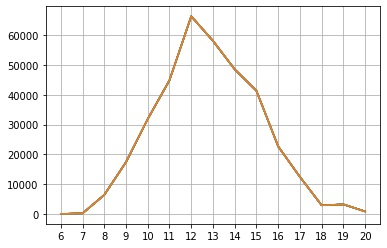

In [ ]:
hours=[hour for hour,i in data.groupby('Hour')]
plt.plot(hours,data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

Around 7 to 12 

What products are often sold together?

In [ ]:
new_data=data[data['InvoiceNo'].duplicated(keep=False)]
new_data['Together']=new_data.groupby('InvoiceNo')['Description'].transform(lambda x: ','.join(x))
new_data=new_data[['InvoiceNo','Together']].drop_duplicates(keep='first')
new_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,Together
InvoiceDate,,
2010-12-01 08:26:00,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
2010-12-01 08:28:00,536366,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
2010-12-01 08:34:00,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
2010-12-01 08:34:00,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
2010-12-01 09:01:00,536372,"HAND WARMER RED POLKA DOT,HAND WARMER UNION JACK"


Two items usually bought together

In [ ]:
count = Counter()

for row in new_data['Together']:
  lis=row.split(',')
  count.update(Counter(combinations(lis,2)))   #Change this number to find 'n' items bought together

for key,val in count.most_common(10):
  print(key , val)

('KEY FOB ', 'KEY FOB ') 644
('KEY FOB ', ' BACK DOOR ') 452
('KEY FOB ', ' SHED') 425
('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER') 421
('KEY FOB ', ' FRONT  DOOR ') 349
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.') 302
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT') 300
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT') 296
('ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER') 285
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ') 279
